In [55]:
import numpy as np
import matplotlib.pyplot as plt
import bionetgen
import roadrunner

# Load model from BNGL
#infile="mapk3_inh.bngl"
infile="lr_init.bngl"
model = bionetgen.bngmodel(infile) 
sim = model.setup_simulator() # sim is a libroadrunner simulator object

## Run a single simulation and plot the results

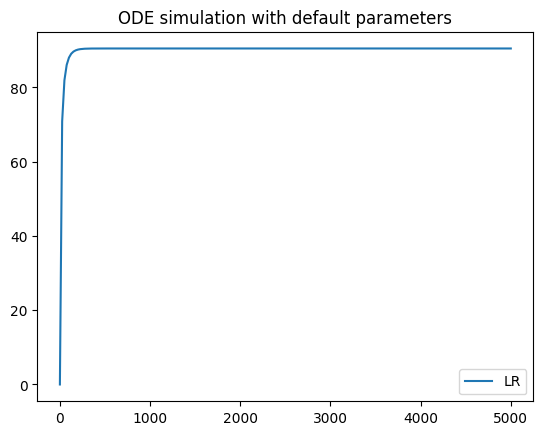

In [68]:
# Simulate using RoadRunner defaults (ODEs)
onames= [ o for o in model.observables]
sel = ['Time'] + onames
#sim['kin_inh_factor']=1.0
#sim['L0']=100
sim.reset()
res1= sim.simulate(0,5000,200,selections=sel)

# Plot observables
for o in onames:
    plt.plot(res1['time'],res1[o],label=o)
plt.title("ODE simulation with default parameters")
_= plt.legend()

## Compare results of two simulations

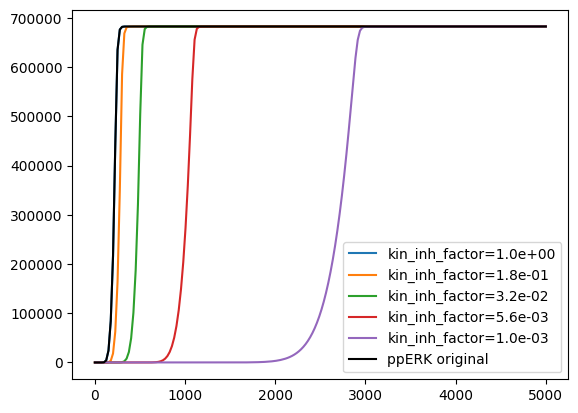

In [41]:
pname='kin_inh_factor'
for k in np.logspace(0,-3,5): 
    sim[pname]=k
    sim.reset() 
    res2= sim.simulate(0,5000,200,selections=sel)
    o= 'ppERK'
    plt.plot(res2['time'],res2[o],label=f'{pname}={k:0.1e}')
plt.plot(res1['time'],res1[o],'k', label=o + ' original')
plt.legend(loc='best')


## Scan the initial concentration of ligand and plot steady state value

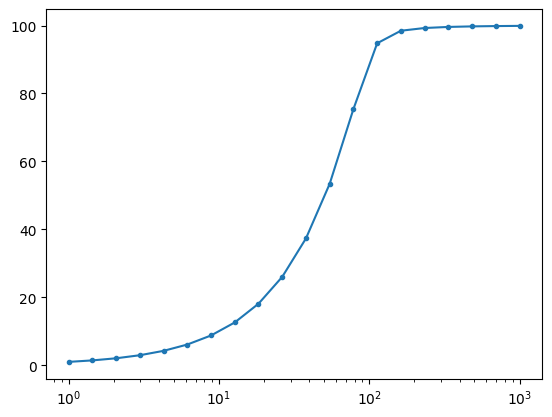

In [82]:
pname='L0'
o='LR'
out=[]
krange= np.logspace(0,3,20)
for k in krange: 
    sim[pname]=k
    # Must reset simulator AFTER changing initial condition.
    sim.reset() 
    res2= sim.simulate(0,5000,200,selections=sel)
    res= res2[o][-1]
    #print(k,res)
    out.append(res)
plt.semilogx(krange,out,'.-')

In [73]:
print(krange)
print(out)

[1.00000000e-02 1.62377674e-02 2.63665090e-02 4.28133240e-02
 6.95192796e-02 1.12883789e-01 1.83298071e-01 2.97635144e-01
 4.83293024e-01 7.84759970e-01 1.27427499e+00 2.06913808e+00
 3.35981829e+00 5.45559478e+00 8.85866790e+00 1.43844989e+01
 2.33572147e+01 3.79269019e+01 6.15848211e+01 1.00000000e+02]
[0.009900980388904574, 0.0160769718226028, 0.02610538694810437, 0.04238925169919142, 0.06883050052243292, 0.11176488973440749, 0.1814799718785325, 0.29467963853958384, 0.4784851673036682, 0.7769298373383854, 1.2614988263382207, 2.048227509944148, 3.325420203300761, 5.398528770620111, 8.762625839315518, 14.218743057267991, 23.05754214592718, 37.33121126153904, 60.079822246194574, 90.48750786770157]
